In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1 사용

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1 활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [4]:
# tensor  = data(상수, 변수)와 연산
node1 = tf.constant("Hello Tensorflow")
sess = tf.Session()
print(sess.run(node1))

b'Hello Tensorflow'


In [6]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16) # 기본값 : tf.float64
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [8]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [9]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [12]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균 0, 표준편차 1인 난수 실수 1개(정규분포 이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a, b])

[array([0.34983236], dtype=float32), array([1.0394791], dtype=float32)]

In [13]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([-0.66988766], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현

## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [15]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias를 처음엔 랜덤 세팅, 학습과정에서 변경
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
# cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 w, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분 값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습(v2에서는 fit함수)
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:4.18384313583374, W:[0.76631296], b:[-0.35002193]
200번째 cost:0.06010836735367775, W:[1.2840651], b:[0.35425287]
400번째 cost:0.02295231632888317, W:[1.1755351], b:[0.60096735]
600번째 cost:0.008764324709773064, W:[1.1084701], b:[0.7534221]
800번째 cost:0.0033466441091150045, W:[1.0670278], b:[0.84762996]
1000번째 cost:0.0012779204407706857, W:[1.0414195], b:[0.9058444]
1200번째 cost:0.0004879710904788226, W:[1.0255946], b:[0.9418175]
1400번째 cost:0.0001863268989836797, W:[1.0158157], b:[0.9640472]
1600번째 cost:7.115043990779668e-05, W:[1.0097731], b:[0.97778314]
1800번째 cost:2.716783455980476e-05, W:[1.0060393], b:[0.98627144]
2000번째 cost:1.0374616067565512e-05, W:[1.003732], b:[0.9915165]
2200번째 cost:3.9616907088202424e-06, W:[1.0023061], b:[0.99475753]
2400번째 cost:1.513248321316496e-06, W:[1.0014254], b:[0.99676]
2600번째 cost:5.782980565527396e-07, W:[1.0008813], b:[0.99799705]
2800번째 cost:2.2129215437871608e-07, W:[1.0005453], b:[0.9987612]
3000번째 cost:8.475264934304505e-08, W:[1.0003375

In [16]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [17]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [18]:
def predict(x):
    return W_[0]*x + b_[0]

In [19]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?3
예측값은  4.000007212162018


## 2.2 predict를 위한 placeholder 이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [20]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [34]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],feed_dict={x:x_data,y:y_data})
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:66.14973449707031, W:[1.3963438], b:[-1.2181948]
200번째 cost:0.12316678464412689, W:[2.11935], b:[0.36207566]
400번째 cost:0.012114467099308968, W:[2.0374308], b:[0.7999331]
600번째 cost:0.0011915562208741903, W:[2.0117393], b:[0.9372548]
800번째 cost:0.00011719910253304988, W:[2.0036817], b:[0.980322]
1000번째 cost:1.1526879461598583e-05, W:[2.0011547], b:[0.9938284]
1200번째 cost:1.1344109225319698e-06, W:[2.0003622], b:[0.9980641]
1400번째 cost:1.1164384261519444e-07, W:[2.0001135], b:[0.99939287]
1600번째 cost:1.1021666246335826e-08, W:[2.0000355], b:[0.999809]
1800번째 cost:1.0749431345047356e-09, W:[2.0000114], b:[0.99994004]
2000번째 cost:1.1729070492627613e-10, W:[2.000004], b:[0.99998003]
2200번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000번째 cost:2.060005464821213e-11, W:[2.000

In [35]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [36]:
sess.run(H, feed_dict={x:np.array([5,6,7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale 조정x)

In [37]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,5,68,80,95])
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],feed_dict={x:x_data,y:y_data})
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:5148.2236328125, W:[7.693245], b:[-0.5445852]
200번째 cost:113.92974853515625, W:[10.602457], b:[-4.39387]
400번째 cost:113.0167007446289, W:[10.772887], b:[-5.6557827]
600번째 cost:112.93296813964844, W:[10.824509], b:[-6.0380077]
800번째 cost:112.92525482177734, W:[10.840145], b:[-6.1537786]
1000번째 cost:112.92454528808594, W:[10.844881], b:[-6.1888466]
1200번째 cost:112.92448425292969, W:[10.846315], b:[-6.199469]
1400번째 cost:112.92448425292969, W:[10.84675], b:[-6.202684]
1600번째 cost:112.92447662353516, W:[10.846882], b:[-6.2036576]
1800번째 cost:112.92451477050781, W:[10.846921], b:[-6.203953]
2000번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2200번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2400번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2600번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
2800번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
3000번째 cost:112.92449951171875, W:[10.846933], b:[-6.20404]
3200번째 cost:112.92449951171875, W:[10.

In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(scale 조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0 ~ 1 사이로 조정
                     X-Xmin
    normalization = ㅡㅡㅡㅡㅡㅡ
                    Xmax-Xmin
            * 위 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.MinMaxScaler 이용)
- standardization(표준화) :  평균 0, 표준편차 1로 조정
                        X-Xmean(평균)
    standardization = ---------------
                        Xstd(표준편차)
            * 위 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

In [39]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,5,68,80,95])
scaled_x_data = (x_data-x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data-y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.02173913 0.70652174 0.83695652 1.        ]


In [43]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,5,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화 시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+00, 1.11111111e-01, 2.17391304e-02],
       [5.00000000e+00, 6.80000000e+01, 4.44444444e-01, 7.06521739e-01],
       [8.00000000e+00, 8.00000000e+01, 7.77777778e-01, 8.36956522e-01],
       [1.00000000e+01, 9.50000000e+01, 1.00000000e+00, 1.00000000e+00]])

In [44]:
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x:scaled_x_data,
                                             y:scaled_y_data})
    if step%600 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:1.4193464517593384, W:[1.7578148], b:[-1.4602787]
600번째 cost:0.22409753501415253, W:[1.9630414], b:[-0.70681995]
1200번째 cost:0.1300603151321411, W:[1.9116066], b:[-0.48689398]
1800번째 cost:0.09946084022521973, W:[1.8154674], b:[-0.39300245]
2400번째 cost:0.07835023105144501, W:[1.7203697], b:[-0.33313143]
3000번째 cost:0.06248987466096878, W:[1.6351074], b:[-0.2859401]
3600번째 cost:0.050502657890319824, W:[1.5603918], b:[-0.24599433]
4200번째 cost:0.041439224034547806, W:[1.4952939], b:[-0.21150304]
4800번째 cost:0.034586451947689056, W:[1.438661], b:[-0.18156567]
5400번째 cost:0.02940499782562256, W:[1.3894093], b:[-0.15554617]
6000번째 cost:0.025487283244729042, W:[1.3465817], b:[-0.13292389]
6600번째 cost:0.022525062784552574, W:[1.3093406], b:[-0.11325338]
7200번째 cost:0.020285308361053467, W:[1.2769579], b:[-0.09614914]
7800번째 cost:0.018591830506920815, W:[1.2487999], b:[-0.08127633]
8400번째 cost:0.017311375588178635, W:[1.2243154], b:[-0.06834389]
9000번째 cost:0.01634320616722107, W:[1.203

In [50]:
# 예측
scaled_input = scaler_x.transform(np.array([[2],
                                           [3]]))
print("모델 예측을 위한 입력 : ", scaled_input, sep="\n")
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print("모델 예측 결과 : ", scaled_output, sep="\n")
print("결과 : ", scaler_y.inverse_transform(scaled_output), sep="\n")

모델 예측을 위한 입력 : 
[[0.11111111]
 [0.22222222]]
모델 예측 결과 : 
[[0.10633541]
 [0.23207544]]
결과 : 
[[12.782858]
 [24.35094 ]]


In [52]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

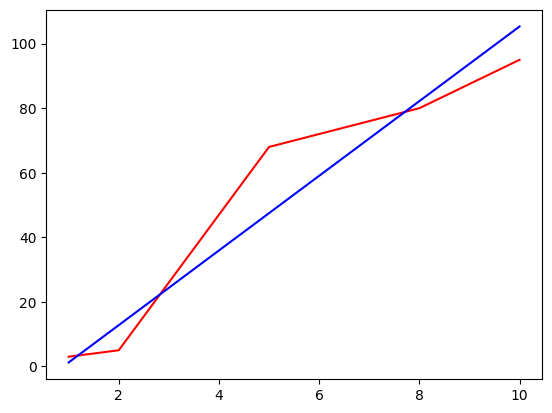

In [53]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [55]:
# 라이브러리를 이용하여 표준화(standardScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,5,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2  5]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.22009861]
 [-0.93313895 -1.16839952]
 [-0.05832118  0.46012193]
 [ 0.81649658  0.77031649]
 [ 1.39970842  1.1580597 ]]


In [56]:
# placeholder 설정(입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
#Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x:scaled_x_data,
                                             y:scaled_y_data})
    if step%600 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:0.4616635739803314, W:[1.1381025], b:[0.59454787]
600번째 cost:0.11040790379047394, W:[1.0146505], b:[0.17885931]
1200번째 cost:0.07861919701099396, W:[0.9775119], b:[0.05380672]
1800번째 cost:0.07574230432510376, W:[0.9663392], b:[0.01618681]
2400번째 cost:0.07548194378614426, W:[0.9629782], b:[0.00486952]
3000번째 cost:0.07545838505029678, W:[0.96196705], b:[0.00146491]
3600번째 cost:0.07545623928308487, W:[0.961663], b:[0.00044069]
4200번째 cost:0.07545604556798935, W:[0.96157247], b:[0.00013258]
4800번째 cost:0.07545604556798935, W:[0.96154696], b:[3.9879997e-05]
5400번째 cost:0.07545605301856995, W:[0.96154696], b:[1.1989576e-05]
6000번째 cost:0.07545605301856995, W:[0.96154696], b:[3.599129e-06]
6600번째 cost:0.07545603811740875, W:[0.96154696], b:[1.0753478e-06]
7200번째 cost:0.07545604556798935, W:[0.96154696], b:[3.1577028e-07]
7800번째 cost:0.07545603811740875, W:[0.96154696], b:[8.577174e-08]
8400번째 cost:0.07545604556798935, W:[0.96154696], b:[2.5943367e-08]
9000번째 cost:0.07545604556798935, 

In [57]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

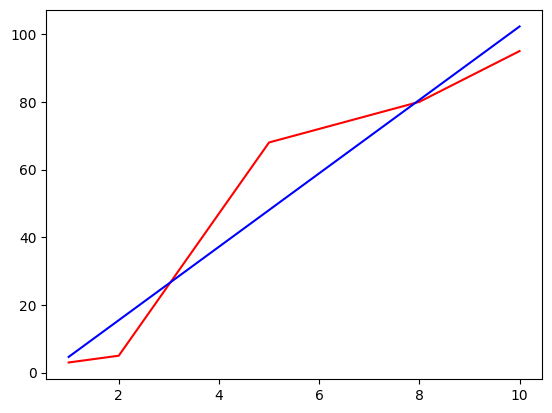

In [58]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')